In [1]:
#importing libraries

import pandas as pd
import xml.etree.cElementTree as ET #XML Parser
from lxml import etree #ElementTree and lxml allow us to parse the XML file.
import requests #make request to server
import time #pause loop

# Old Bailey Classification Part 1: Data Preperation

### 1) Old Bailey Data

In this section, you will outline your choice of how to subset the Old Bailey data. You should think about
an interesting point in history that you want to explore, or a question about particular categories of crime.
Explore the Old Bailey website for inspiration!

#### 1.1 Pick an outcome category
There are multiple outcome categories that you might consider exploring. There are offence categories/subcategories, verdicts, and sentences. Choose an outcome category of interest, and explain why you
want to explore it.


I stumbled upon the Black communities section in the Old Bailey and read a little bit about the organization 
of slavery in England. In particular the notion that slaves were "property" was overturned by the abolition of slavery/slave trade in 1806. Illegal slave trade continued were many of the court cases are in the Old Bailey 
under the subcategory "kidnapping" since "slaves" were abducted by slave traders. I'm interested to see the way 
in which these cases were carried out and especially if these white men were actually found guilty for kidnapping
people into slavery. 

#### 1.2 Choose a time period
Similarly, pick the time period that you wish to explore. For instance, you might be interested in exploring
a particular decade because of geopolitical events, or doing a before/after comparison after a major policy
reform. As with above, briefly explain why you want to explore this time period.

I'm specifically interested in looking at the time period after 1807. As I mentioned earlier slavery/slave trade
was abolished in 1807 were many cases for illegal slave trade emerged.

#### 1.3 Download the data
You may use the code from the Web Scraping/XML Parsing lab a template to do this programatically.
You may have to tweak the parameters to build a dataset with additional features that you may want for
exploratory or analytical purposes. Ideally, I should be able to run your code and get the exact data you are
using for the lab without needing to read in a csv from a local directory.

In [3]:
trials = requests.get('https://www.oldbaileyonline.org/obapi/ob?term0=offsubcat_kidnapping&term1=fromdate_18061203&term2=todate_19001210&&start=0&count=181&inputFormat=OBapiSearchJson').json()
trials

{'total': 181,
 'hits': ['t18140914-145',
  't18150111-95',
  't18150405-89',
  't18151025-98',
  't18160529-148',
  't18170219-123',
  't18170702-58',
  't18170917-109',
  't18171029-137',
  't18171203-102',
  't18180617-76',
  't18180909-311',
  't18190217-36',
  't18190526-41',
  't18190915-138',
  't18200112-66',
  't18210912-114',
  't18210912-141',
  't18210912-185',
  't18241202-159',
  't18250113-69',
  't18280703-168',
  't18290611-194',
  't18300415-307',
  't18301028-151',
  't18310407-123',
  't18310908-27',
  't18310908-184',
  't18310908-185',
  't18340102-87',
  't18340904-122',
  't18341124-122a',
  't18350511-1234',
  't18360704-1705',
  't18360815-1807',
  't18360919-2143',
  't18371023-2278',
  't18371023-2417',
  't18380709-1659',
  't18380917-2150',
  't18390304-995',
  't18390408-1189',
  't18390617-1950',
  't18410823-1992',
  't18420404-1381',
  't18430612-1908',
  't18431023-2895',
  't18440205-807',
  't18440610-1582',
  't18440610-1583',
  't18440701-1858',
 

In [4]:
for trial in trials['hits'][:30]:
    #format URL
    url =  'http://www.oldbaileyonline.org/obapi/text?div={}'.format(trial)
    print(url)
    #get text from URL
    text = requests.get(url).text
    #save the file
    with open('data/old-bailey/old-bailey-' + trial + '.xml', 'w') as file:
        file.write(text)
    #one second pause so servers aren't overloaded
    time.sleep(1)

http://www.oldbaileyonline.org/obapi/text?div=t18140914-145
http://www.oldbaileyonline.org/obapi/text?div=t18150111-95
http://www.oldbaileyonline.org/obapi/text?div=t18150405-89
http://www.oldbaileyonline.org/obapi/text?div=t18151025-98
http://www.oldbaileyonline.org/obapi/text?div=t18160529-148
http://www.oldbaileyonline.org/obapi/text?div=t18170219-123
http://www.oldbaileyonline.org/obapi/text?div=t18170702-58
http://www.oldbaileyonline.org/obapi/text?div=t18170917-109
http://www.oldbaileyonline.org/obapi/text?div=t18171029-137
http://www.oldbaileyonline.org/obapi/text?div=t18171203-102
http://www.oldbaileyonline.org/obapi/text?div=t18180617-76
http://www.oldbaileyonline.org/obapi/text?div=t18180909-311
http://www.oldbaileyonline.org/obapi/text?div=t18190217-36
http://www.oldbaileyonline.org/obapi/text?div=t18190526-41
http://www.oldbaileyonline.org/obapi/text?div=t18190915-138
http://www.oldbaileyonline.org/obapi/text?div=t18200112-66
http://www.oldbaileyonline.org/obapi/text?div=t1

In [5]:
!ls data/old-bailey/

old-bailey-t18140914-145.xml old-bailey-t18200112-66.xml
old-bailey-t18150111-95.xml  old-bailey-t18210912-114.xml
old-bailey-t18150405-89.xml  old-bailey-t18210912-141.xml
old-bailey-t18151025-98.xml  old-bailey-t18210912-185.xml
old-bailey-t18160529-148.xml old-bailey-t18241202-159.xml
old-bailey-t18170219-123.xml old-bailey-t18250113-69.xml
old-bailey-t18170702-58.xml  old-bailey-t18280703-168.xml
old-bailey-t18170917-109.xml old-bailey-t18290611-194.xml
old-bailey-t18171029-137.xml old-bailey-t18300415-307.xml
old-bailey-t18171203-102.xml old-bailey-t18301028-151.xml
old-bailey-t18180617-76.xml  old-bailey-t18310407-123.xml
old-bailey-t18180909-311.xml old-bailey-t18310908-184.xml
old-bailey-t18190217-36.xml  old-bailey-t18310908-185.xml
old-bailey-t18190526-41.xml  old-bailey-t18310908-27.xml
old-bailey-t18190915-138.xml old-bailey-t18340102-87.xml


In [6]:
def table_of_cases(xml_file_name):
    file = ET.ElementTree(file = xml_file_name)
    iterate = file.getiterator()
    i = 1
    table = pd.DataFrame()
    # Create an empty list to store text
    text_list = []
    for element in iterate:
        if element.tag == "interp":
            t = element.attrib['type']
            val = [element.attrib['value']]
            labels = list(table.columns.values)
            num = str(i)
            if t not in labels:
                table[t] = val
            elif t+num not in labels:
                table[t+num] = val
            elif t+num in labels:
                num = str(i+1)
                table[t+num] = val
        elif element.tag == 'p':
            # Use itertext to extract text from element
            text = ''.join(list(element.itertext()))
            # Replace \n (line breaks) and strip out leading numbers
            text = text.replace('\n', '').lstrip('0123456789.- ')
            # Remove excessive white spaces between words
            text = ' '.join(text.split())
            # Append to list
            text_list.append(text)
    # Add contents of list to column in dataframe
    table['text'] = ''.join(text_list)
    return table

In [7]:
table = pd.DataFrame()
for i in trials['hits'][:30]:
    raw_data = 'data/old-bailey/old-bailey-'+ i +'.xml'
    data = table_of_cases(raw_data)
    table = table.append(data, ignore_index=True)
table


/Users/jarellymartin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,age,age1,age2,collection,date,gender,gender1,gender2,given,given1,...,surname1,surname2,text,type,uri,verdictCategory,verdictCategory1,verdictCategory2,verdictSubcategory,year
0,29,NaN,NaN,BAILEY,18140914,female,male,male,SARAH,James,...,M'Donald,SELLERS,"SARAH SIMMONDS was indicted for that she, on t...",NaN,sessionsPapers/18140914,guilty,NaN,NaN,NaN,1814
1,23,NaN,NaN,BAILEY,18150111,female,male,male,SARAH,Matthew,...,Cremer,SWAINE,SARAH STONE was indicted for that she on the 1...,NaN,sessionsPapers/18150111,guilty,NaN,NaN,NaN,1815
2,36,NaN,NaN,BAILEY,18150405,female,male,male,ELIZA,John,...,Hulme,WILBRAHAM,"ELIZA SCOTT was indicted for that she, on the ...",NaN,sessionsPapers/18150405,guilty,NaN,NaN,NaN,1815
3,20,NaN,NaN,BAILEY,18151025,female,male,female,ELIZABETH,William,...,Dawson,Dawson,"ELIZABETH ASHFIELD was indicted for that she, ...",NaN,sessionsPapers/18151025,guilty,NaN,NaN,lesserOffence,1815
4,NaN,NaN,NaN,BAILEY,18160529,female,indeterminate,NaN,AMELIA,NaN,...,NaN,NaN,AMELIA MARSH was indicted for child stealing ....,NaN,sessionsPapers/18160529,notGuilty,NaN,NaN,NaN,1816
5,22,NaN,NaN,BAILEY,18170219,male,male,male,JOHN BEAN,JOSEPH,...,EVANS,M'DONALD,(His Majesty's Special Commission was then put...,crimeLocation,sessionsPapers/18170219,guilty,NaN,NaN,NaN,1817
6,45,NaN,NaN,BAILEY,18170702,female,male,female,HARRIET MOLYNEUX,Henry,...,Porter,Wood,"HARRIET MOLYNEUX HAMILTON was indicted, for th...",NaN,sessionsPapers/18170702,guilty,NaN,NaN,NaN,1817
7,17,NaN,NaN,BAILEY,18170917,female,male,male,ELIZA,William Joseph,...,Canning,JOSEPH CANNING,ELIZA COBB was indicted for feloniously and ma...,NaN,sessionsPapers/18170917,guilty,NaN,NaN,NaN,1817
8,26,NaN,NaN,BAILEY,18171029,female,male,female,ANN,John,...,Moseley,PEARCE,ANN LEE was indicted for feloniously taking an...,crimeLocation,sessionsPapers/18171029,guilty,NaN,NaN,NaN,1817
9,20,NaN,NaN,BAILEY,18171203,female,female,male,LOUISA,Susannah,...,Potter,HUTCHINS,"LOUISA PERKINS was indicted for that she, on t...",crimeLocation,sessionsPapers/18171203,guilty,NaN,NaN,NaN,1817


### 2) Exploratory Data Analysis/Data Preparation

#### 2.1 Preprocess the text.
Use techniques covered in labs such as tokenizing, stemming, and chunking, as well as any other methods you
might find helpful. In a few sentences, explain your choice of techniques, and your general goals at this stage.

In [8]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk import RegexpParser


In [9]:
#remove punctuation, then tokenize, then remove stop words.
#punctuation is a list of punctuation strings
def rem_punc_stop(text):
    from string import punctuation
    from nltk.corpus import stopwords

    stop_words = set(stopwords.words("english"))
    punctuation = set(punctuation)
    
    punc_free = "".join([ch for ch in text if ch not in punctuation])
    
    words = nltk.word_tokenize(punc_free)
    
    noise_free = [word for word in words if word not in stop_words]
    
    return noise_free

In [10]:
#stemming 
snowball = nltk.SnowballStemmer('english')


In [11]:
#chuncking
sents = nltk.sent_tokenize(table['text'][0])
    
grammar = "NP: {<DT>?<JJ>*<NN.*>+}"
cp = RegexpParser(grammar)


s_tagged = nltk.pos_tag(sents[1])
s_chunked = cp.parse(s_tagged)
s_chunked.draw()


In [12]:
def does_it_all(text):
    tokens = ""
    
    not_stemmed = rem_punc_stop(text)
    stemmed = [snowball.stem(word.lower()) for word in not_stemmed]
    for word in not_stemmed:
        tokens += snowball.stem(word) + " "
    
    return tokens

In [13]:
table['tokens'] = table['text'].apply(does_it_all)
table

,age,age1,age2,collection,date,gender,gender1,gender2,given,given1,...,surname2,text,type,uri,verdictCategory,verdictCategory1,verdictCategory2,verdictSubcategory,year,tokens
0,29,NaN,NaN,BAILEY,18140914,female,male,male,SARAH,James,...,SELLERS,"SARAH SIMMONDS was indicted for that she, on t...",NaN,sessionsPapers/18140914,guilty,NaN,NaN,NaN,1814,sarah simmond indict 10th august forc take car...
1,23,NaN,NaN,BAILEY,18150111,female,male,male,SARAH,Matthew,...,SWAINE,SARAH STONE was indicted for that she on the 1...,NaN,sessionsPapers/18150111,guilty,NaN,NaN,NaN,1815,sarah stone indict 14th octob certain child ma...
2,36,NaN,NaN,BAILEY,18150405,female,male,male,ELIZA,John,...,WILBRAHAM,"ELIZA SCOTT was indicted for that she, on the ...",NaN,sessionsPapers/18150405,guilty,NaN,NaN,NaN,1815,eliza scott indict 12th march certain femal ch...
3,20,NaN,NaN,BAILEY,18151025,female,male,female,ELIZABETH,William,...,Dawson,"ELIZABETH ASHFIELD was indicted for that she, ...",NaN,sessionsPapers/18151025,guilty,NaN,NaN,lesserOffence,1815,elizabeth ashfield indict 19th septemb st leon...
4,NaN,NaN,NaN,BAILEY,18160529,female,indeterminate,NaN,AMELIA,NaN,...,NaN,AMELIA MARSH was indicted for child stealing ....,NaN,sessionsPapers/18160529,notGuilty,NaN,NaN,NaN,1816,amelia marsh indict child steal but event case...
5,22,NaN,NaN,BAILEY,18170219,male,male,male,JOHN BEAN,JOSEPH,...,M'DONALD,(His Majesty's Special Commission was then put...,crimeLocation,sessionsPapers/18170219,guilty,NaN,NaN,NaN,1817,his majesti special commiss put read empow cou...
6,45,NaN,NaN,BAILEY,18170702,female,male,female,HARRIET MOLYNEUX,Henry,...,Wood,"HARRIET MOLYNEUX HAMILTON was indicted, for th...",NaN,sessionsPapers/18170702,guilty,NaN,NaN,NaN,1817,harriet molyneux hamilton indict 6th june felo...
7,17,NaN,NaN,BAILEY,18170917,female,male,male,ELIZA,William Joseph,...,JOSEPH CANNING,ELIZA COBB was indicted for feloniously and ma...,NaN,sessionsPapers/18170917,guilty,NaN,NaN,NaN,1817,eliza cobb indict feloni malici fraud take car...
8,26,NaN,NaN,BAILEY,18171029,female,male,female,ANN,John,...,PEARCE,ANN LEE was indicted for feloniously taking an...,crimeLocation,sessionsPapers/18171029,guilty,NaN,NaN,NaN,1817,ann lee indict feloni take carri away certain ...
9,20,NaN,NaN,BAILEY,18171203,female,female,male,LOUISA,Susannah,...,HUTCHINS,"LOUISA PERKINS was indicted for that she, on t...",crimeLocation,sessionsPapers/18171203,guilty,NaN,NaN,NaN,1817,louisa perkin indict 4th novemb certain child ...


Here, I used three different techniques tokenizing, stemming, and chunking in order to manipulate the text
to make sure it was ready for the data analysis portion. First, I used the tokenizing technique in order to split up the text into individual words/phrases, remove any puntuation and any stop words (English words such as and, the, is, etc.). Then I used the chunching method to seperate text into "chunks" to later then find how many times a particular word shows up. Finally, did the stemming method which clumps words that are similar by the root of a specific word to help with dimensionality of the text.

#### 2.2 Use a feature extraction method to build the dataset.
In class, we used simple word frequencies and tf-idf. You might use these, extend the tf-idf with more
specifications, or another method entirely. Explain the underlying assumptions for your chosen method, and
explain its advantages and disadvantages

In [33]:
#from datascience import *
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import itertools
import seaborn as sns
%matplotlib inline

In [15]:
text_list = table['text']

In [16]:
tf = TfidfVectorizer(analyzer='word', 
                     ngram_range=(1,3), 
                     min_df = 0, 
                     stop_words = 'english')

In [17]:
tfidf_matrix = tf.fit_transform(text_list)
feature_names = tf.get_feature_names()
len(feature_names)

26868

Here, I used the Term Frequency-Inverse Document Frequency technique (tf-idf) in order to determine the amount 
of times a word appears in one/all documents. First, Term Frequency calculate that number of times a specific word appears in a document divided by the total number of words in that document. Then the inverse document frequency part determines the importance of a specific word in all documents. One of the pros with this method is that its good at finding and seperating words which are highly correlated across different documents. Another pro is that it provides better information than bag-of-words. A few disadvantages with this method is that it can be very computationally expensive and dimensionality can increase.

#### 2.3 Report any interesting descriptive statistics through plots and tables.
You might report word frequencies, clustering patterns, etc. that might help with your analysis. Feel free to
get creative here!

In [18]:
tokens_list = table['tokens']

In [19]:
#We can use sklearn to construct a bag-of-words representation of text. Create an instance of CountVectorizer.
from sklearn.feature_extraction.text import CountVectorizer

# Construct the tokenizer.
cv = CountVectorizer()
dtm = cv.fit_transform(tokens_list)
dtm

<30x2850 sparse matrix of type '<class 'numpy.int64'>'
	with 7926 stored elements in Compressed Sparse Row format>

In [20]:
word_list = cv.get_feature_names()
desparse = dtm.toarray()
# create a new table with pandas data frame
dtm_df = pd.DataFrame(columns=word_list, data=desparse)
dtm_df.head()

,102,108,10s,10th,12,12s,12th,13,13th,14,...,yesfrederick,yesjohn,yessamuel,yet,yield,you,youhil,youhillann,young,youngest
0,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,6,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dtm_df.columns

Index(['102', '108', '10s', '10th', '12', '12s', '12th', '13', '13th', '14',
       ...
       'yesfrederick', 'yesjohn', 'yessamuel', 'yet', 'yield', 'you', 'youhil',
       'youhillann', 'young', 'youngest'],
      dtype='object', length=2850)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Top 10 Words'),
 Text(0.5, 1.0, 'Count of Top 10 words')]

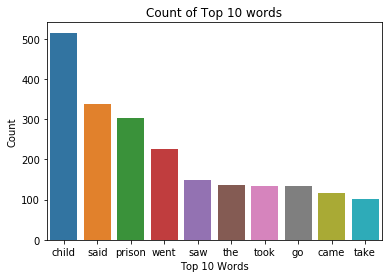

In [36]:
count = dtm_df.sum(axis = 0).to_frame().sort_values(by=0, ascending = False).rename(index=str, columns={0: "count"})
count10 = count[:10]

a = sns.barplot(x=count10.index, y="count", data=count10)
a.set(xlabel='Top 10 Words', ylabel='Count', title= "Count of Top 10 words")

Above, I found the top 10 words that appear in the documents and created a bar plot. Since I am looking at kidnapping subcategory it makes sense that the word child appears the most throughout the documents. Hence, 
most cases are related to the kidnapping of children. 

In [101]:
table['char_count'] = table['text'].str.len()
table['word_count'] = table['tokens'].str.len()
table['sentence_count'] = table['text'].apply(nltk.sent_tokenize).str.len()
table['avg_word_length'] = table['char_count'] / table['word_count']
table['avg_sentence_length'] = table['word_count'] / table['sentence_count']
table

,age,age1,age2,collection,date,gender,gender1,gender2,given,given1,...,verdictCategory1,verdictCategory2,verdictSubcategory,year,tokens,word_count,sentence_count,avg_sentence_length,char_count,avg_word_length
0,29,NaN,NaN,BAILEY,18140914,female,male,male,SARAH,James,...,NaN,NaN,NaN,1814,sarah simmond indict 10th august forc take car...,2912,73,39.890411,5188,1.781593
1,23,NaN,NaN,BAILEY,18150111,female,male,male,SARAH,Matthew,...,NaN,NaN,NaN,1815,sarah stone indict 14th octob certain child ma...,6610,89,74.269663,11860,1.794251
2,36,NaN,NaN,BAILEY,18150405,female,male,male,ELIZA,John,...,NaN,NaN,NaN,1815,eliza scott indict 12th march certain femal ch...,934,11,84.909091,1499,1.604925
3,20,NaN,NaN,BAILEY,18151025,female,male,female,ELIZABETH,William,...,NaN,NaN,lesserOffence,1815,elizabeth ashfield indict 19th septemb st leon...,2015,31,65.000000,3490,1.732010
4,NaN,NaN,NaN,BAILEY,18160529,female,indeterminate,NaN,AMELIA,NaN,...,NaN,NaN,NaN,1816,amelia marsh indict child steal but event case...,147,2,73.500000,226,1.537415
5,22,NaN,NaN,BAILEY,18170219,male,male,male,JOHN BEAN,JOSEPH,...,NaN,NaN,NaN,1817,his majesti special commiss put read empow cou...,7151,103,69.427184,12721,1.778912
6,45,NaN,NaN,BAILEY,18170702,female,male,female,HARRIET MOLYNEUX,Henry,...,NaN,NaN,NaN,1817,harriet molyneux hamilton indict 6th june felo...,5193,65,79.892308,9436,1.817061
7,17,NaN,NaN,BAILEY,18170917,female,male,male,ELIZA,William Joseph,...,NaN,NaN,NaN,1817,eliza cobb indict feloni malici fraud take car...,2060,21,98.095238,3784,1.836893
8,26,NaN,NaN,BAILEY,18171029,female,male,female,ANN,John,...,NaN,NaN,NaN,1817,ann lee indict feloni take carri away certain ...,1418,30,47.266667,2368,1.669958
9,20,NaN,NaN,BAILEY,18171203,female,female,male,LOUISA,Susannah,...,NaN,NaN,NaN,1817,louisa perkin indict 4th novemb certain child ...,3002,65,46.184615,5447,1.814457


In the above table you can see that I found the character, word, and sentence count an added as columns. Also, 
found the average word length and sentence length. They seem to differ across all documents, where the only thing that seemed to be consistent was the avg. word length. 


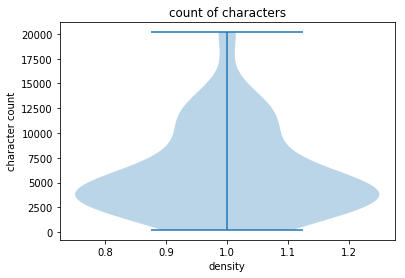

In [55]:
plt.violinplot(table['char_count'])
plt.ylabel('character count')
plt.xlabel('density')
plt.title('count of characters');

Here, looking at the violin plot for the count of characters across all documents we see that a 
majority of documents fall under the 2500-5000 character count. 

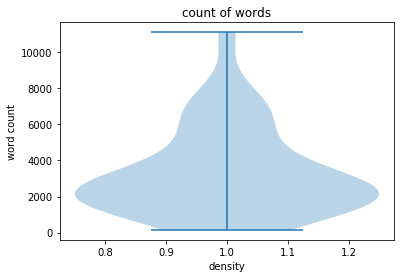

In [104]:
plt.violinplot(table['word_count'])
plt.ylabel('word count')
plt.xlabel('density')
plt.title('count of words');

Looking at the violin plot for the word count we see that the majority of documents fall under the
~2000 character count. 

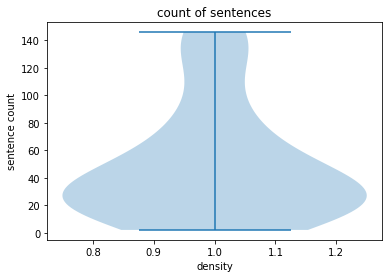

In [105]:
plt.violinplot(table['sentence_count'])
plt.ylabel('sentence count')
plt.xlabel('density')
plt.title('count of sentences');



The violtin plot for the count of sentences across all documents indicates that most documents fall in the
20-40 sentences range.


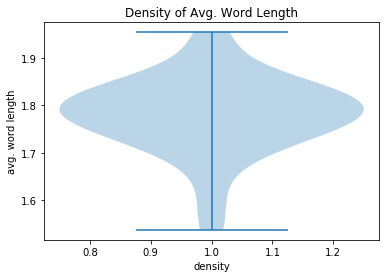

In [107]:
plt.violinplot(table['avg_word_length'])
plt.ylabel('avg. word length')
plt.xlabel('density')
plt.title('Density of Avg. Word Length');


According to our violin plot, the average word length for the majority of documents is about 1.8.

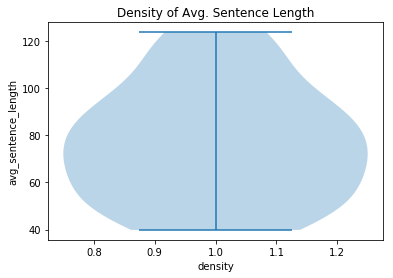

In [109]:
plt.violinplot(table['avg_sentence_length'])
plt.ylabel('avg_sentence_length')
plt.xlabel('density')
plt.title('Density of Avg. Sentence Length');


The violin plot above doesn't have a clear bell shaped curve since the average sentence length for all documents falls between 40-100 sentenes.

In [92]:
dtm_df['slave']

0      0
1      0
2      0
3      0
4      0
5     31
6      0
7      0
8      0
9      0
10     0
11     0
12     6
13     0
14     0
15     5
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
Name: slave, dtype: int64

In [93]:
sum(dtm_df['slave'])

42

In [86]:
dtm_df['trade']

0     0
1     0
2     0
3     0
4     0
5     3
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: trade, dtype: int64

In [94]:
sum(dtm_df['trade'])

4

In [87]:
dtm_df['men']

0     0
1     0
2     0
3     2
4     0
5     7
6     0
7     0
8     0
9     0
10    0
11    0
12    2
13    1
14    0
15    7
16    0
17    0
18    0
19    0
20    5
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: men, dtype: int64

In [95]:
sum(dtm_df['men'])

24

In [128]:
dtm_df['woman']

0     10
1     13
2      0
3      4
4      0
5      0
6      1
7      2
8      2
9      0
10     1
11     3
12     1
13     0
14     2
15     0
16     1
17     2
18     0
19     2
20    14
21     0
22     1
23     1
24     6
25     2
26     1
27     1
28     3
29     6
Name: woman, dtype: int64

In [129]:
sum(dtm_df['woman'])

79

In [97]:
dtm_df['negro']

0     0
1     0
2     0
3     0
4     0
5     2
6     0
7     0
8     0
9     0
10    0
11    0
12    3
13    0
14    0
15    2
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: negro, dtype: int64

In [100]:
sum(dtm_df['negro'])

7

In [102]:
dtm_df['black']

0      0
1      0
2      0
3      0
4      0
5      3
6      0
7      0
8      0
9      0
10     0
11     0
12    22
13     1
14     0
15     6
16     0
17     1
18     0
19     1
20     0
21     0
22     0
23     0
24     1
25     1
26     0
27     0
28     0
29     0
Name: black, dtype: int64

In [103]:
sum(dtm_df['black'])

36

In [127]:
dtm_df['africa']

0     0
1     0
2     0
3     0
4     0
5     6
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: africa, dtype: int64

In [126]:
sum(dtm_df['africa'])

7

Above, I picked out a few words that I wanted to analyze and see how many times they appear throughtout the documents. Since I was particularly interested in looking at cases that related to illegal slavery I looked into words such as Africa, black, negro, slavery, men, and trade. It seems that these words don't come up to frequently across documents, but they are frequesnt across specific documents. This mean that those are the documents that are related to the illegal slavery of black communties. 